# Intro to Jax

In [4]:
from jax import grad

def f(x):
    return x**2

grad_f = grad(f)

f(3.), grad_f(3.)

(9.0, DeviceArray(6., dtype=float32))

In [22]:
def f(x, y):
    return y * x**2

grad_f = grad(f, argnums=(0, 1))

dx, dy = grad_f(1., 2.)
dx, dy

(DeviceArray(4., dtype=float32), DeviceArray(1., dtype=float32))

# Arrays

In [23]:
import jax.numpy as np

In [28]:
from jax import hessian

In [31]:
def f(x):
    return np.sum(x**2)

grad_f = grad(f)
hess_f = hessian(f)

hessian(np.array([0.1, 0.2]))

DeviceArray([[-5.905694 ,  0.       ],
             [ 0.       , -0.7950852]], dtype=float32)

# Speed

In [48]:
def g(x):
    return np.sum(x**2)

grad_g = grad(g)

grad_g(1.0)

DeviceArray(2., dtype=float32)

In [52]:
%time _ = np.stack([grad_g(i) for i in np.linspace(0, 10, 1000)])

CPU times: user 2.65 s, sys: 449 ms, total: 3.1 s
Wall time: 2.28 s


In [53]:
from jax import jit

In [54]:
grad_g = jit(grad(g))
grad_g(1.0)

DeviceArray(2., dtype=float32)

In [55]:
%time _ = np.stack([grad_g(i) for i in np.linspace(0, 10, 1000)])

CPU times: user 280 ms, sys: 61.8 ms, total: 342 ms
Wall time: 238 ms


In [56]:
from jax import vmap

In [61]:
%time _ = vmap(grad_g)(np.linspace(0, 10, 1000))

CPU times: user 22.7 ms, sys: 3.52 ms, total: 26.3 ms
Wall time: 23.9 ms


# Full Train Loop

In [70]:
def predict(params, inputs):
    return inputs @ params 

def mse(params, inputs, targets):
    preds = predict(params, inputs)
    return np.mean((preds - targets)**2)

grad_fun = jit(grad(mse))

In [76]:
import tqdm
from numpy import zeros
from numpy.random import normal

n, k = 10_000, 5
X = np.concatenate([np.ones((n, 1)), normal(0, 1, (n, k))], axis=1)
true_w = normal(0, 5, (k + 1,))
y = X @ true_w
W = normal(0, 1, (k + 1,))
stepsize = 0.02
n_step = 100
hist_gd = zeros((n_step,))
for i in tqdm.tqdm(range(n_step)):
    dW = grad_fun(W, inputs=X, targets=y)
    W -= dW*stepsize
    hist_gd[i] = mse(W, inputs=X, targets=y)

100%|██████████| 100/100 [00:00<00:00, 660.49it/s]


In [78]:
true_w, W

(array([ 4.44226847, -6.76762119,  6.00692163, -1.13450748, -5.7014697 ,
        -4.67501268]),
 DeviceArray([ 4.323477 , -6.633852 ,  5.9252224, -1.1087155, -5.583535 ,
              -4.5851116], dtype=float32))

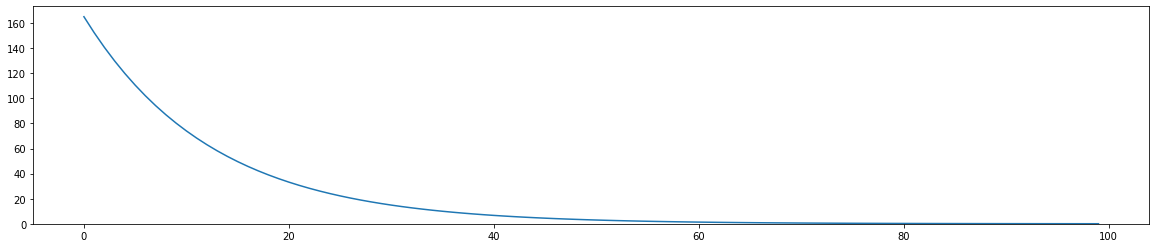

In [80]:
import matplotlib.pylab as plt 

plt.figure(figsize=(20, 4))
plt.plot(hist_gd)
plt.ylim(0);

# Closing Notes

In [85]:
def abs_val(x):
    if x > 0:
        return x
    return -x

grad(abs_val)(-2.0)

DeviceArray(-1., dtype=float32)